In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')

In [3]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#I will choose to keep all columns (model, registrations, etc.)

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
#let's drop the rows with missing values

In [8]:
data_no_missing = data.dropna(axis=0)

In [9]:
data_no_missing.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [10]:
#now with outliers (min and max values)

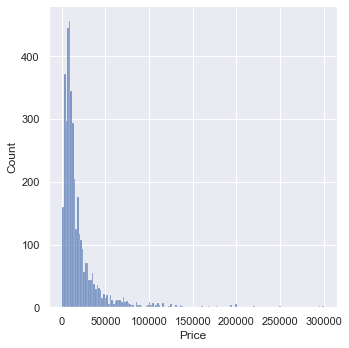

In [11]:
sns.displot(x=data_no_missing['Price'])

In [12]:
#remove top and bottom 1% of observations

In [13]:
q_top = data_no_missing['Price'].quantile(0.99)
data_1 = data_no_missing[data_no_missing['Price'] < q_top]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


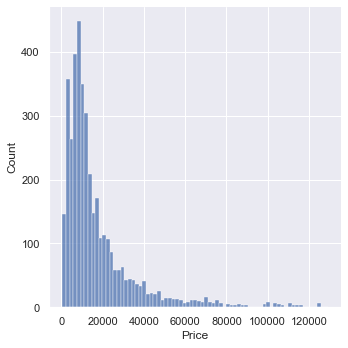

In [14]:
sns.displot(x=data_1['Price'])

In [15]:
q_bottom = data_1['Price'].quantile(0.01)
data_2 = data_1[data_1['Price'] > q_bottom]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,18004.596504,164.697262,2.752860,2006.443458
std,18998.863669,102.744093,4.980197,6.510558
min,1600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2007.000000
75%,21500.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


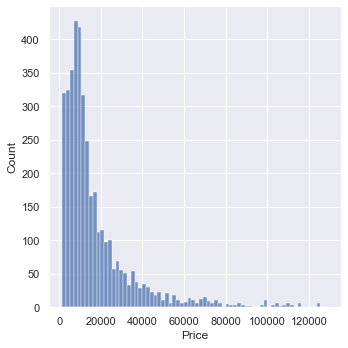

In [16]:
sns.displot(x=data_2['Price'])

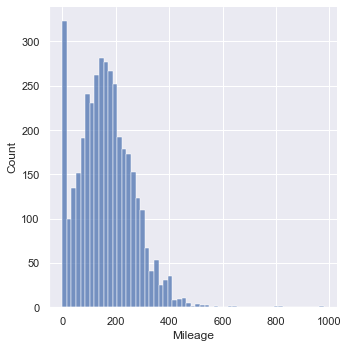

In [17]:
sns.displot(x=data_2['Mileage'])

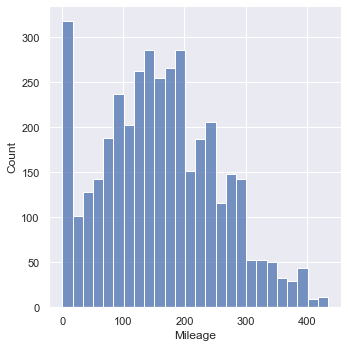

In [18]:
q = data_2['Mileage'].quantile(0.99)
data_3 = data_2[data_2['Mileage'] < q]
sns.displot(x=data_3['Mileage'])

In [19]:
data_3['Mileage'].describe()

count    3904.000000
mean      161.023309
std        95.914826
min         0.000000
25%        91.750000
50%       157.000000
75%       227.000000
max       435.000000
Name: Mileage, dtype: float64

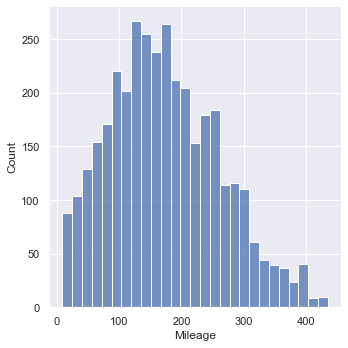

In [20]:
q = data_3['Mileage'].quantile(0.07)
data_4 = data_3[data_3['Mileage'] > q]
sns.displot(x=data_4['Mileage'])

In [21]:
data_5 = data_4[data_4['EngineV'] < 6.5]

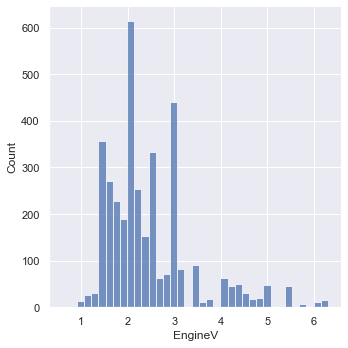

In [22]:
sns.displot(x=data_5['EngineV'])

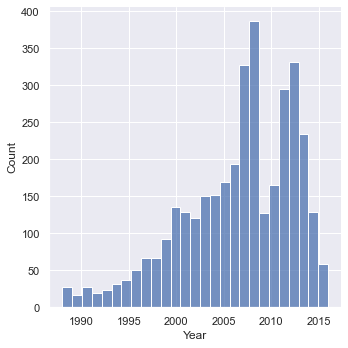

In [23]:
q = data_5['Year'].quantile(0.01)
data_6 = data_5[data_5['Year'] > q]
sns.displot(x=data_6['Year'])

In [24]:
clean_data = data_6.reset_index(drop=True)

In [25]:
clean_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3565,3565.000000,3565,3565.000000,3565.000000,3565,3565,3565.000000,3565
unique,7,NaN,6,NaN,NaN,4,2,NaN,274
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,774,NaN,1374,NaN,NaN,1629,3230,NaN,175
mean,NaN,16053.289279,NaN,172.144741,2.464289,NaN,NaN,2006.308275,NaN
std,NaN,15093.599587,NaN,87.951767,0.959528,NaN,NaN,5.722448,NaN
min,NaN,1600.000000,NaN,9.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7170.000000,NaN,107.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11111.000000,NaN,164.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,19700.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [26]:
#data is done cleaning

In [27]:
#onto checking linearity

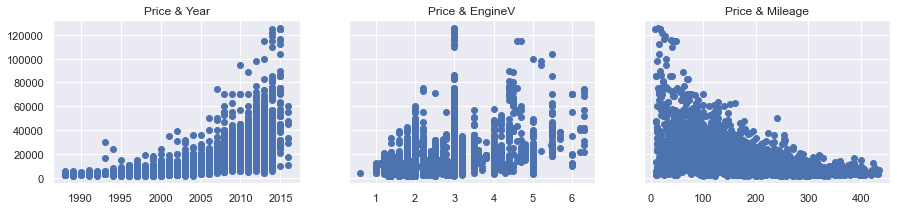

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(clean_data['Year'], clean_data['Price'])
ax1.set_title('Price & Year')
ax2.scatter(clean_data['EngineV'], clean_data['Price'])
ax2.set_title('Price & EngineV')
ax3.scatter(clean_data['Mileage'], clean_data['Price'])
ax3.set_title('Price & Mileage')
plt.show()

In [29]:
#transforming variables to make them linear using log transformations

In [30]:
log_price = np.log(clean_data['Price'])
clean_data['log_price'] = log_price
clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3560,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3561,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3562,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3563,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069


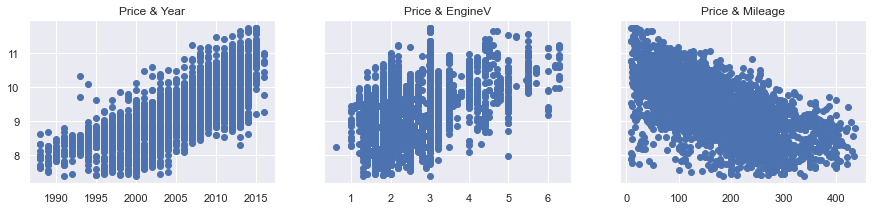

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(clean_data['Year'], clean_data['log_price'])
ax1.set_title('Price & Year')
ax2.scatter(clean_data['EngineV'], clean_data['log_price'])
ax2.set_title('Price & EngineV')
ax3.scatter(clean_data['Mileage'], clean_data['log_price'])
ax3.set_title('Price & Mileage')
plt.show()

In [32]:
#now we will only use "log_price". So we drop "price"

In [33]:
clean_data = clean_data.drop(['Price'], axis=1)

In [34]:
clean_data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3560,Renault,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3561,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3562,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3563,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069


In [35]:
#checking multicolliearity using stastsmodels

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,4.793635,Mileage
1,11.434247,Year
2,7.594617,EngineV


In [37]:
#year is too corelated to other variables. So we drop it.

In [38]:
data_no_multicolliearity = clean_data.drop(['Year'], axis=1)

In [39]:
data_no_multicolliearity.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
count,3565,3565,3565.000000,3565.000000,3565,3565,3565,3565.000000
unique,7,6,NaN,NaN,4,2,274,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,774,1374,NaN,NaN,1629,3230,175,NaN
mean,NaN,NaN,172.144741,2.464289,NaN,NaN,NaN,9.359482
std,NaN,NaN,87.951767,0.959528,NaN,NaN,NaN,0.798461
min,NaN,NaN,9.000000,0.600000,NaN,NaN,NaN,7.377759
25%,NaN,NaN,107.000000,1.800000,NaN,NaN,NaN,8.877661
50%,NaN,NaN,164.000000,2.200000,NaN,NaN,NaN,9.315691
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,NaN,9.888374


In [40]:
#creating dummy variables for categorical data

In [41]:
data_dummies = pd.get_dummies(data_no_multicolliearity, drop_first=True)
data_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#rearrange columns as per convenience. I'll put "log_price" first, as it is the most important here.

In [43]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_250',
       'Model_300', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760

In [44]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_250',
       'Model_300', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_A 140', 'Model_A 150',
       'Model_A 170', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Caravelle', 'Model_Carina',
       'Model_Carisma', 'Model_Celica', 'Model_Clio', 'Model_Colt',
       'Model_Corolla', 'Model_Corolla Verso', 'Model_Cross Touran',
       'Model_Duster', 'Model_E-Class', 'Model_Eclipse', 'Model_Eos',
       'Model_Espace', 'Model_FJ Cruiser', 'Model_Fluence',
       'Model_Fortuner', 'Model_G 320', 'Model_G 350', 'Model_G 500',
       'Model_G 55 AMG', 'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350',
       'Model_GL 420', 'Model_GL 450', 'Model_GL 500', 'Model_GL 550',
       'Model_GLK 220', 'Model_GLK 300', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 80', 'Model_Land Cruiser Prado',
       'Model_Latitude', 'Model_Logan', 'Model_Lupo', 'Model_M5',
       'Model_M6', 'Model_MB', 'Model_ML 250', 'Model_ML 270',
       'Model_ML 280', 'Model_ML 320', 'Model_ML 350', 'Model_ML 400',
       'Model_ML 430', 'Model_ML 500', 'Model_ML 550', 'Model_ML 63 AMG',
       'Model_Master', 'Model_Matrix', 'Model_Megane', 'Model_Modus',
       'Model_Multivan', 'Model_New Beetle', 'Model_Outlander',
       'Model_Outlander XL', 'Model_Pajero', 'Model_Pajero Pinin',
       'Model_Pajero Sport', 'Model_Pajero Wagon', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 140', 'Model_S 250',
       'Model_S 300', 'Model_S 320', 'Model_S 350', 'Model_S 400',
       'Model_S 430', 'Model_S 500', 'Model_S 550', 'Model_S 600',
       'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4', 'Model_S5',
       'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero', 'Model_Scenic',
       'Model_Scion', 'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan',
       'Model_Sienna', 'Model_Smart', 'Model_Space Star',
       'Model_Space Wagon', 'Model_Sprinter 208', 'Model_Sprinter 210',
       'Model_Sprinter 211', 'Model_Sprinter 212', 'Model_Sprinter 213',
       'Model_Sprinter 311', 'Model_Sprinter 312', 'Model_Sprinter 313',
       'Model_Sprinter 315', 'Model_Sprinter 316', 'Model_Sprinter 318',
       'Model_Sprinter 319', 'Model_Symbol', 'Model_Syncro',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [45]:
preprocessed_data = data_dummies[cols]
preprocessed_data.describe(include='all')

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
count,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,...,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000
mean,9.359482,172.144741,2.464289,0.157924,0.194390,0.079944,0.112482,0.129593,0.217111,0.066199,...,0.041515,0.002525,0.002525,0.024684,0.001683,0.008976,0.000842,0.003366,0.000281,0.000842
std,0.798461,87.951767,0.959528,0.364721,0.395786,0.271244,0.316003,0.335903,0.412337,0.248665,...,0.199505,0.050188,0.050188,0.155183,0.040996,0.094330,0.029001,0.057928,0.016748,0.029001
min,7.377759,9.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.877661,107.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.315691,164.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.888374,230.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.744037,435.000000,6.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#creating linear regression model

In [47]:
#set inputs and targets

targets = preprocessed_data['log_price']
inputs = preprocessed_data.drop(['log_price'], axis=1)

In [48]:
#feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [50]:
inputs_scaled = scaler.transform(inputs)

In [51]:
#splits train and test data

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2)

In [53]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [54]:
y_hat = reg.predict(x_train)

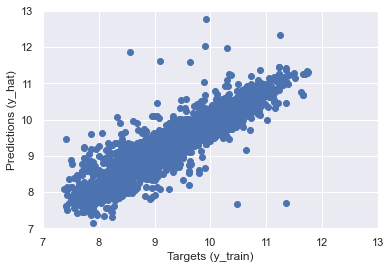

In [55]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.xlim(7,13)
plt.ylim(7,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

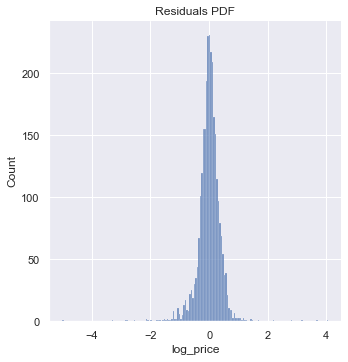

In [56]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF')

In [57]:
reg.score(x_train, y_train)

0.7511563378580839

In [58]:
#The accuracy of my model on the training data is 84.40%. Pretty good so far

In [59]:
#find weights and bias

In [60]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Feature'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Feature,Weights
0,Mileage,-3.595744e-01
1,EngineV,7.720802e-02
2,Brand_BMW,6.451802e+12
3,Brand_Mercedes-Benz,7.001326e+12
4,Brand_Mitsubishi,-2.195132e+12
...,...,...
285,Model_X6,-7.035471e+11
286,Model_X6 M,-2.162987e+11
287,Model_Yaris,-1.329490e+12
288,Model_Z3,2.718929e+12


In [61]:
#testing

In [62]:
y_hat_test = reg.predict(x_test)

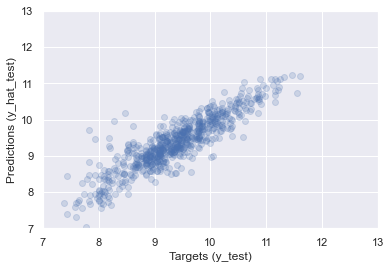

In [63]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(7,13)
plt.ylim(7,13)
plt.show()

In [64]:
#checking dataframe performace

df_perf = pd.DataFrame(y_hat_test, columns = ['Prediction'])
df_perf

,Prediction
0,9.684647e+00
1,6.189172e+14
2,9.005630e+00
3,8.359146e+00
4,8.741287e+00
...,...
708,8.911880e+00
709,1.020296e+01
710,8.589920e+00
711,1.024593e+01


In [65]:
#these are the log_prices, so we'll take exponentials of these

In [66]:
df_perf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_perf

<ipython-input-66-7e5e62b5415e>:1: RuntimeWarning: overflow encountered in exp
  df_perf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])


,Prediction
0,1.606899e+04
1,inf
2,8.148837e+03
3,4.269048e+03
4,6.255943e+03
...,...
708,7.419600e+03
709,2.698286e+04
710,5.377184e+03
711,2.816755e+04


In [67]:
df_perf['Target'] = np.exp(y_test)
df_perf

,Prediction,Target
0,1.606899e+04,NaN
1,inf,NaN
2,8.148837e+03,NaN
3,4.269048e+03,NaN
4,6.255943e+03,NaN
...,...,...
708,7.419600e+03,NaN
709,2.698286e+04,NaN
710,5.377184e+03,NaN
711,2.816755e+04,NaN


In [68]:
y_test #this has messed up indexes, which cause a problem

3256     9.786954
8        7.824046
1846    10.043249
1002     8.942461
2244     9.392579
          ...    
1806     8.839277
2959     9.746834
420      8.779557
1239     9.792556
886      9.830917
Name: log_price, Length: 713, dtype: float64

In [69]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.786954
1     7.824046
2    10.043249
3     8.942461
4     9.392579
Name: log_price, dtype: float64

In [70]:
df_perf['Target'] = np.exp(y_test)
df_perf

,Prediction,Target
0,1.606899e+04,17800.0
1,inf,2500.0
2,8.148837e+03,23000.0
3,4.269048e+03,7650.0
4,6.255943e+03,11999.0
...,...,...
708,7.419600e+03,6900.0
709,2.698286e+04,17100.0
710,5.377184e+03,6500.0
711,2.816755e+04,17900.0


In [71]:
df_perf['Residual'] = df_perf['Target'] - df_perf['Prediction']

In [72]:
df_perf['Diff%'] = np.absolute(df_perf['Residual'] / df_perf['Target'] * 100)

In [73]:
df_perf

,Prediction,Target,Residual,Diff%
0,1.606899e+04,17800.0,1.731010e+03,9.724775
1,inf,2500.0,-inf,inf
2,8.148837e+03,23000.0,1.485116e+04,64.570274
3,4.269048e+03,7650.0,3.380952e+03,44.195452
4,6.255943e+03,11999.0,5.743057e+03,47.862794
...,...,...,...,...
708,7.419600e+03,6900.0,-5.196005e+02,7.530442
709,2.698286e+04,17100.0,-9.882861e+03,57.794507
710,5.377184e+03,6500.0,1.122816e+03,17.274097
711,2.816755e+04,17900.0,-1.026755e+04,57.360617


In [74]:
df_perf.describe()

,Prediction,Target,Residual,Diff%
count,7.130000e+02,713.000000,7.130000e+02,713.000000
mean,inf,15930.995792,-inf,inf
std,NaN,14717.782530,NaN,NaN
min,0.000000e+00,1600.000000,-inf,0.205258
25%,7.434106e+03,7400.000000,-1.984412e+03,9.773827
50%,1.133566e+04,11500.000000,1.561031e+02,20.019979
75%,1.868934e+04,18900.000000,2.454231e+03,36.675853
max,inf,115555.000000,1.155550e+05,inf


In [75]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x) #show only 2 digits after decimal
df_perf.sort_values(by = 'Diff%')

,Prediction,Target,Residual,Diff%
295,14470.24,14500.00,29.76,0.21
238,2793.74,2800.00,6.26,0.22
679,22081.99,22000.00,-81.99,0.37
21,26771.24,26900.00,128.76,0.48
500,35744.30,35555.00,-189.30,0.53
11,7944.54,8000.00,55.46,0.69
275,21343.90,21500.00,156.10,0.73
484,34644.56,34900.00,255.44,0.73
478,9571.83,9500.00,-71.83,0.76
417,9573.59,9500.00,-73.59,0.77


In [76]:
q = df_perf['Diff%'].quantile(0.98)
df_perf = df_perf[df_perf['Diff%'] < q]


In [77]:
df_perf.describe()

,Prediction,Target,Residual,Diff%
count,698.00,698.00,698.00,698.00
mean,14663.51,16067.51,1404.00,27.63
std,11838.75,14776.37,8202.58,31.24
min,0.00,1600.00,-21909.64,0.21
25%,7348.10,7500.00,-1872.93,9.48
50%,11112.69,11600.00,253.59,19.38
75%,18248.89,18900.00,2557.18,34.61
max,74738.90,115555.00,115555.00,355.21


## Tensorflow

In [78]:
import tensorflow as tf